# Quantum Dense Coding Protocol

<img src="images/QuntumDenseCoding.png"/>


In [1]:
from qiskit import QuantumCircuit
from qiskit import Aer,execute

# EPR Source
Generates one of the four Bell states according to the values of x and y. 
<img src="images/EPRsource.png" width="400"/>


In [2]:
def EPR_Source(qubit0,qubit1):
    """
    Generates one of the four Bell states according to the values of the qubits.
    
    Parameters:
    qubit0 (int): The initial value of the first qubit (0 or 1).
    qubit1 (int): The initial value of the second qubit (0 or 1).
    
    Returns:
    QuantumCircuit: Qiskit quantum circuit which contains the EPR Source components.
    """
    #creating the quantum circuit
    qc=QuantumCircuit(2)
    
    #changing the qubit value
    if qubit0 == 1:
        qc.x(0)
    if qubit1 == 1:
        qc.x(1)
    qc.barrier()
    
    #entangle the two qubits
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()
    
    return qc


#testing
#circuit=EPR_Source(1,1)
#backend = Aer.get_backend('statevector_simulator')
#systemState = execute(circuit,backend).result().get_statevector()
#print("systemState",systemState)
#circuit.draw(output='mpl')


# Encoder
Alice encodes the two classical bits (i,j) to send them over one quantum channel.

<img src="images/Encoder.png" width="600"/>


In [3]:
def Encoder(clbit0,clbit1):
    """
    Encodes two classical bits to send them over one quantum channel.
    
    Parameters:
    clbit0 (int): The value of the first classical bit (0 or 1).
    clbit1 (int): The value of the second classical bit (0 or 1).
    
    Returns:
    QuantumCircuit: Qiskit quantum circuit which contains the encoding gates.
    """
    #creating the quantum circuit
    qc=QuantumCircuit(2)
    
    #Encoding
    if clbit0 == 0 and clbit1 == 1:
        qc.x(0)
    elif clbit0 == 1 and clbit1 == 0:
        qc.y(0)
    elif clbit0 == 1 and clbit1 == 1:
        qc.z(0)
    if clbit0 != 0 and clbit1 != 0:
        qc.barrier()
    
    return qc


#testing
#Encoder(0,0).draw(output='mpl')
        

# Decoder
Alice sends her qubit to Bob, then Bob decodes the received data.


<img src="images/Decoder.png" width="800"/>


In [4]:
def Decoder(circuit):
    """
    Decodes the receiced data (removes the super position) with error (needs correction).
    
    Parameters: 
    circuit (QuantumCircuit): Two qubit circuit, the first qubit is received from the sender 
                              and the second qubit from the EPR source.
    Returns:
    QuantumCircuit: Qiskit quantum circuit after applying the decoding gates.
    """
    circuit.cx(0,1)
    circuit.h(0)
    circuit.barrier()
    
    return circuit

#testing
#qc=QuantumCircuit(2)
#qc.h(0)
#qc.cx(0,1)
#qc.barrier()

#Decoder(qc).draw(output='mpl')

# Correction Step

#### The correction is dependent on the Bell state that generated from the EPR source.

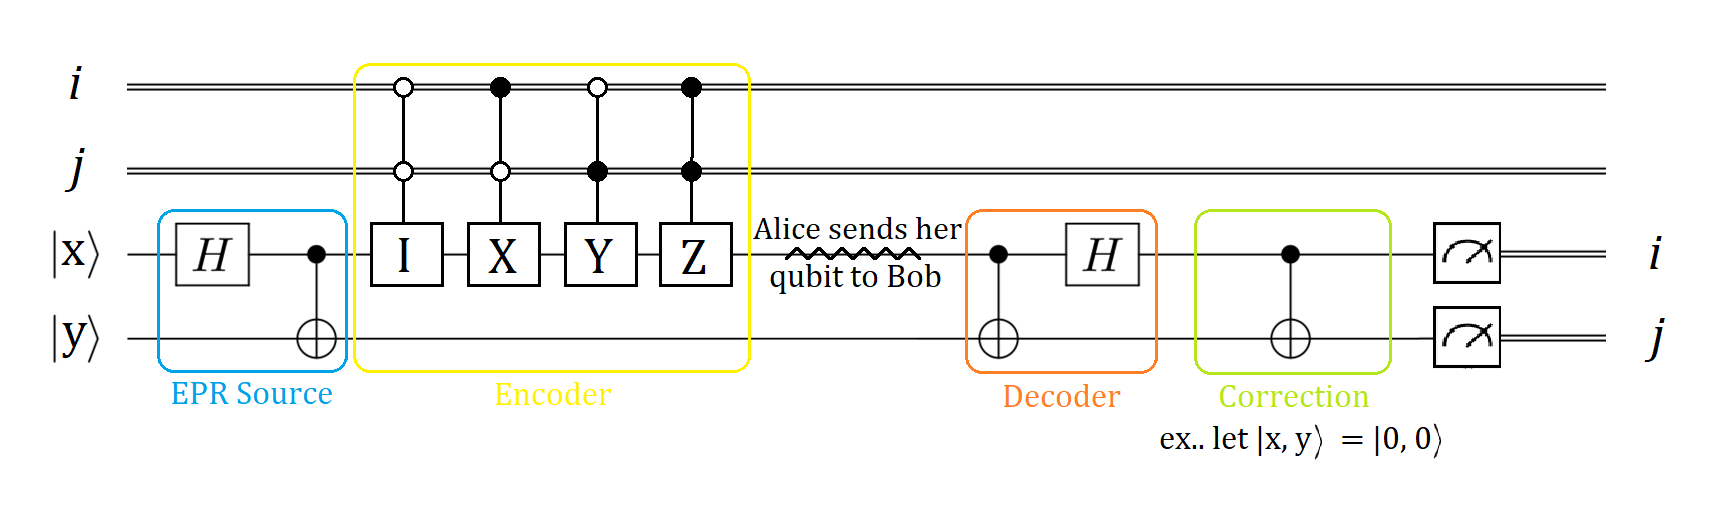

#### Different corrections are stated in the following table. <br>
    
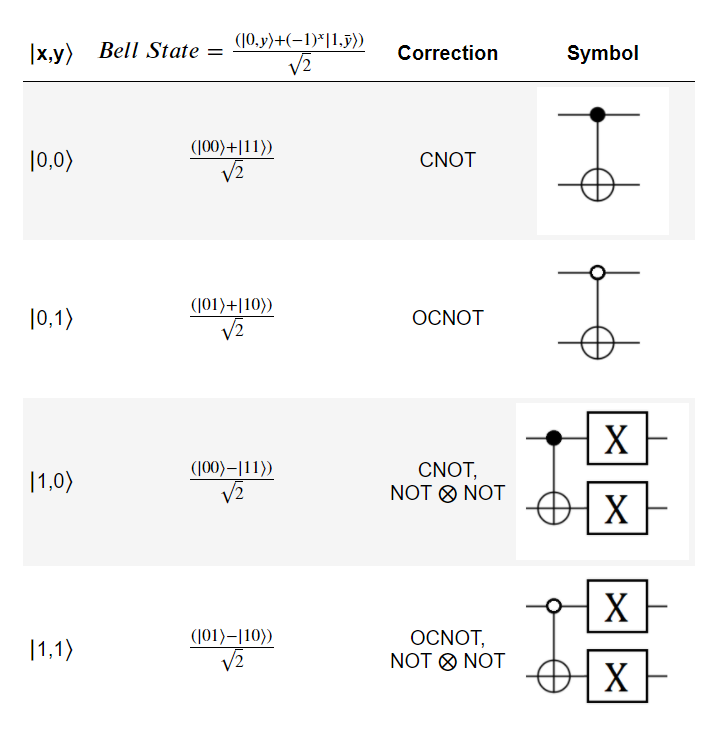



In [5]:
def Correction(circuit,qubit0,qubit1):
    """
    Applies some gates to correct the decoded data, these gates are determined according to 
    the Bell state that generated from the EPR source.
    
    Parameters:
    circuit (QuantumCircuit): The quantum circuit after decoding.
    qubit0 (int): The initial value of the first qubit (0 or 1).
    qubit1 (int): The initial value of the second qubit (0 or 1).
    
    Returns:
    QuantumCircuit: Qiskit quantum circuit after applying the correction.
    """
    if qubit1 == 1:
        circuit.x(0) #open control
        
    circuit.cx(0,1)
    
    if qubit1 == 1:
        circuit.x(0) #open control
    
    if qubit0 == 1:
        circuit.x(0)
        circuit.x(1)
    
        
    return circuit
    

In [6]:
def QuantumDenseCoding(clbit0, clbit1, qubit0 = 0, qubit1 = 0):
    """
    Creates the circuit of the quantum dence coding protocol.
    
    Parameters:
    clbit0 (int): The first classical bit Alice wants to send. 
    clbit1 (int): The second classical bit Alice wants to send. 
    qubit0 (int): The first qubit for the EPR source. (By default = 0)    
    qubit1 (int): The second qubit for the EPR source. (By default = 0)
    
    Note: setting qubit0 and qubit1 values to determine which Bell state will be generated.
    
    Returns:
    QuantumCircuit: Qiskit quantum circuit after constructing the quantum dense coding protocol.
        
    """
    
    #create the quantum circuit
    circuit=QuantumCircuit(2)
    
    circuit=circuit+EPR_Source(qubit0,qubit1)
    circuit=circuit+Encoder(clbit0, clbit1)
    circuit=Decoder(circuit)
    circuit=Correction(circuit,qubit0,qubit1)
    
    circuit.measure_all()
    
    return circuit
    

In [7]:
#Alice wants to send 
clbit0,clbit1 = 1,1

#select the initial value of the EPR source
qubit0,qubit1= 1,1

print("\nAlice sent : ", clbit0,clbit1)
        
qc=QuantumDenseCoding(clbit0,clbit1,qubit0,qubit1)
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print("Bob received : ",list(counts.keys())[0][::-1])


Alice sent :  1 1
Bob received :  11


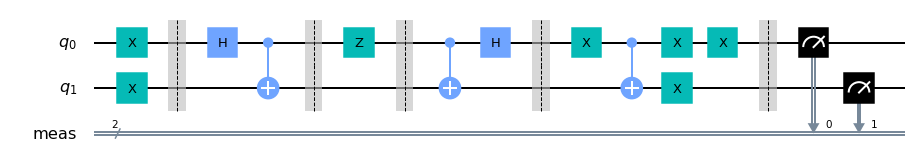

In [8]:
qc.draw(output="mpl")

In [9]:
#select the initial value of the EPR source
qubit0,qubit1= 1,1


#testing all possible messages

for clbit0 in [0,1]:
    for clbit1 in [0,1]:
        
        print("\nAlice sent : ", clbit0,clbit1)
        
        qc=QuantumDenseCoding(clbit0,clbit1,qubit0,qubit1)
        backend_sim = Aer.get_backend('qasm_simulator')
        job_sim = execute(qc, backend_sim)
        result_sim = job_sim.result()
        counts = result_sim.get_counts(qc)
        msgReceived = list(counts.keys())[0][::-1]
        
        print("Bob received : ", msgReceived)



Alice sent :  0 0
Bob received :  00

Alice sent :  0 1
Bob received :  01

Alice sent :  1 0
Bob received :  10

Alice sent :  1 1
Bob received :  11
